<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/RNN_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Flow
0  32.0
1  27.0
2  27.0
3  25.0
4  27.0
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0021 - val_loss: 2.2057e-04
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.2720e-04 - val_loss: 1.1382e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 1.2959e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5273e-04 - val_loss: 9.5635e-05
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7176e-04 - val_loss: 9.0501e-05
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5942e-04 - val_loss: 8.1553e-05
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4180e-04 - val_loss: 2.1193e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 9.5303e-05
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 8.5655e-05
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 8.0178e-05
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2091e-04 - val_loss: 1.2403e-04
Epoch 12/50
52/5

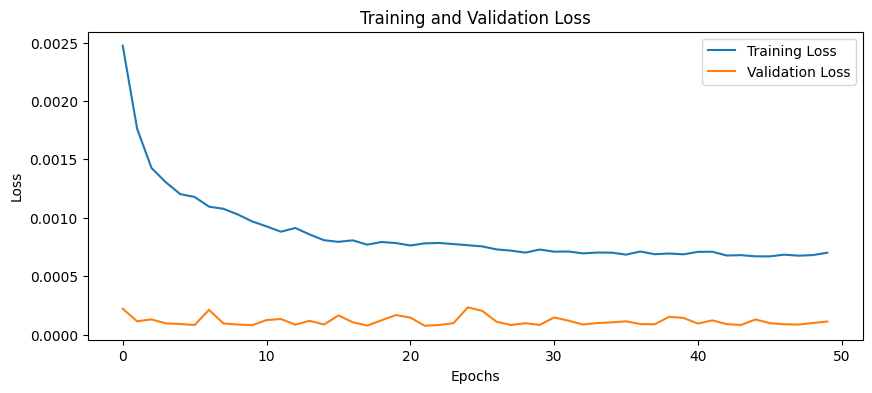

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


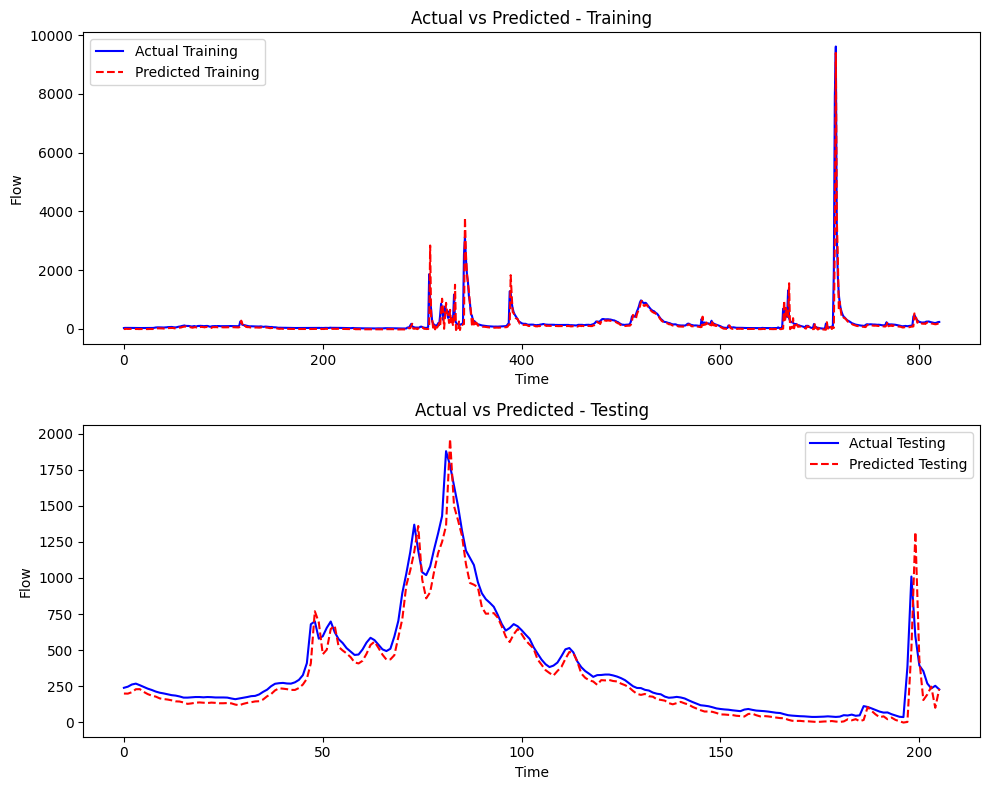

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('River_Flow.csv')

# Display the first few rows of the dataset
# print(data.head())

# Assume the time series values are in a column named 'Flow'
time_series = data['Flow'].values.reshape(-1, 1)

# Normalize the data for better training performance
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series)

# Define a function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set the sequence length to one week (7 days)
sequence_length = 7
X, y = create_sequences(time_series_scaled, sequence_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=False, input_shape=(sequence_length, 1)),
    Dense(1)  # Output layer with a single neuron for prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=16)



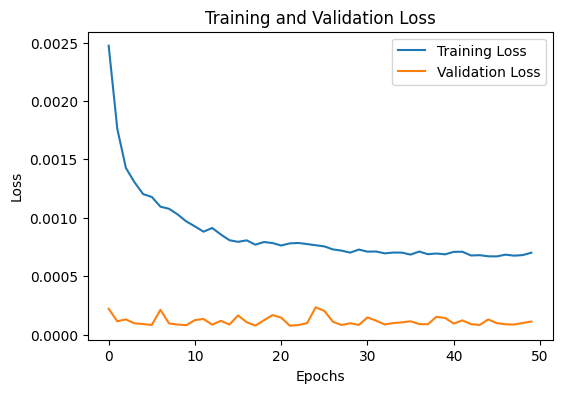

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


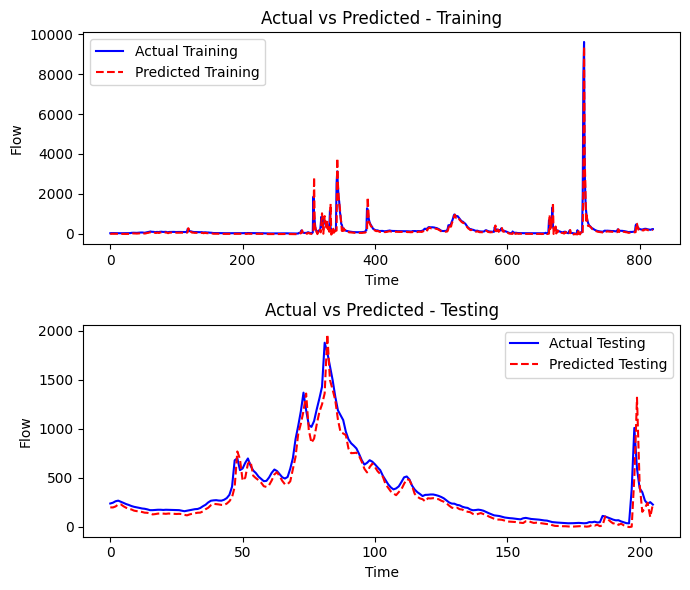

In [16]:
# Plot training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Convert predictions back to original scale
train_predictions_rescaled = scaler.inverse_transform(train_predictions)
test_predictions_rescaled = scaler.inverse_transform(test_predictions)
y_train_rescaled = scaler.inverse_transform(y_train)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot actual vs predicted values for training and testing cases
fig, axes = plt.subplots(2, 1, figsize=(7, 6))

axes[0].plot(y_train_rescaled, label='Actual Training', color='blue')
axes[0].plot(train_predictions_rescaled, label='Predicted Training', color='red', linestyle='dashed')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Flow')
axes[0].legend()
axes[0].set_title('Actual vs Predicted - Training')

axes[1].plot(y_test_rescaled, label='Actual Testing', color='blue')
axes[1].plot(test_predictions_rescaled, label='Predicted Testing', color='red', linestyle='dashed')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Flow')
axes[1].legend()
axes[1].set_title('Actual vs Predicted - Testing')

plt.tight_layout()
plt.show()

In [17]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    vaf = (1 - np.var(y_true - y_pred) / np.var(y_true)) * 100
    relative_error = np.mean(np.abs(y_true - y_pred) / np.abs(y_true)) * 100
    return mse, rmse, vaf, relative_error

train_mse, train_rmse, train_vaf, train_rel_error = calculate_metrics(y_train_rescaled, train_predictions_rescaled)
test_mse, test_rmse, test_vaf, test_rel_error = calculate_metrics(y_test_rescaled, test_predictions_rescaled)

# print(f'Training MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, VAF: {train_vaf:.2f}%, Relative Error: {train_rel_error:.2f}%')
# print(f'Testing MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, VAF: {test_vaf:.2f}%, Relative Error: {test_rel_error:.2f}%')

# Predict one week ahead
def predict_week_ahead(model, last_week_data, scaler):
    prediction_sequence = last_week_data.copy()
    predictions = []
    for _ in range(7):  # Predicting for the next 7 days
        next_day_prediction = model.predict(prediction_sequence.reshape(1, sequence_length, 1))
        predictions.append(next_day_prediction[0, 0])
        prediction_sequence = np.roll(prediction_sequence, -1)
        prediction_sequence[-1] = next_day_prediction
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Take the last week from the dataset
last_week = time_series_scaled[-sequence_length:]
next_week_predictions = predict_week_ahead(model, last_week, scaler)

# Display predictions for the next 7 days
print("Predicted values for the next 7 days:", next_week_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted values for the next 7 days: [ 203.73402   148.0553     81.48973    14.028103  -65.64035  -139.63974
 -211.67096 ]


In [18]:
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'VAF', 'Relative Error'],
    'Training': [train_mse, train_rmse, train_vaf, train_rel_error],
    'Testing': [test_mse, test_rmse, test_vaf, test_rel_error]
})
metrics_df.T

,0,1,2,3
Metric,MSE,RMSE,VAF,Relative Error
Training,63335.91686,251.666281,77.096732,63.056621
Testing,10307.295436,101.524851,94.110466,27.77264
